## Project Goal: 
- The goal of this project is to analyze key property features and build a linear regression model trained on historical housing data. This model is designed to predict house prices based on attributes such as size, amenities, and other structural factors—providing valuable insights for real estate valuation, investment analysis, and market trend forecasting.

- Create a model using Sklearn

- Identify the R-squared

- Plot and display the prediction vs actual data

### 1. Build a model using Sklearn

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [13]:
#Import Data

housing_data = pd.read_csv('housing.csv')
housing_data = housing_data.drop(columns=['furnishingstatus', 'prefarea'])
print(housing_data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [14]:
#Identify all the columns that are 'object' type

categorical_cols = housing_data.select_dtypes(include=['object']).columns.to_list()
print(categorical_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']


In [15]:
#Apply OneHotEncoder to object type columns

encode = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encode.fit_transform(housing_data[categorical_cols])


In [16]:
#Retrieve the new names of the columns

column_encoded = encode.get_feature_names_out(categorical_cols)
print(column_encoded)

['mainroad_yes' 'guestroom_yes' 'basement_yes' 'hotwaterheating_yes'
 'airconditioning_yes']


In [17]:
#Create a dataframe using the data that was encoded

new_data = pd.DataFrame(encoded_features, columns=column_encoded)
new_data

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes
0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0
541,0.0,0.0,0.0,0.0,0.0
542,1.0,0.0,0.0,0.0,0.0
543,0.0,0.0,0.0,0.0,0.0


In [18]:
#Drop the categorical columns and replace it with the encoded version

new_data = pd.concat([housing_data.drop(columns=categorical_cols), new_data], axis=1)
new_data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0


In [19]:
#Set x_variables and y_variables

x_variable = new_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes']]


y_variable = new_data['price']

In [20]:
#Split the data 

x_train, x_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.2, random_state=10)

In [21]:
#Initiate LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)

In [ ]:
#Identify how good the model is using R2

r2 = r2_score(y_test, prediction)
r2

0.7238141074512816

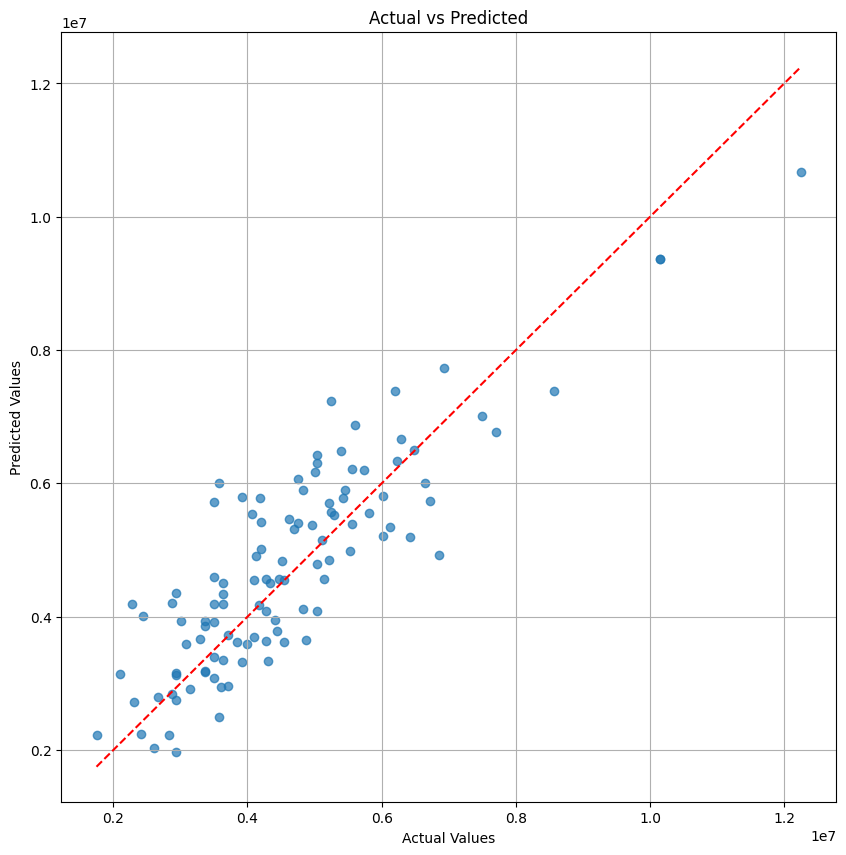

In [ ]:
#Plot the predicted vs actual values

plt.figure(figsize=(10, 10))
plt.scatter(y_test, prediction, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()
